# Testing the "accept" Flag

Having confirmed that the instability issues in the input-output tests are removed once the "thrown" Monte Carlo is used (no detector effects at all) we can start adding in effects one at a time to determine what is causing the problem. This notebook will look at fits done to "mcaccept" data files, which were generated with the "accept" flag in the [monte carlo runner script](/home/kscheuer/work/neutralb1/submission/load_monte_carlo/run_mc.py). This flag means all the 4 vectors used are their generated ones, so no resolution or combinatorics effects occur. This does mean that out of time beam photons could be included, which are handled with the typical RF sideband subtraction method. So if issues crop up here, then this sideband subtraction may be the culprit.

In [1]:
import pandas as pd

from pathlib import Path
import sys, os
parent_dir = str(Path().resolve().parents[3])
sys.path.insert(0, parent_dir)
import analysis.scripts.pwa_tools as pwa_tools

## Randomized Fits
First lets start with the normal randomized fit method to see if they're successful

In [7]:
data_path = f"{parent_dir}/analysis/input-output-tests/0m_1m_1p/mcaccept"

df = pd.read_csv(f"{data_path}/best_accept_fits.csv", index_col="index")
df_data = pd.read_csv(f"{data_path}/accept_data.csv")
df_truth = pd.read_csv(f"{data_path}/truth.csv")

plotter = pwa_tools.Plotter(df, df_data, truth_df=df_truth)

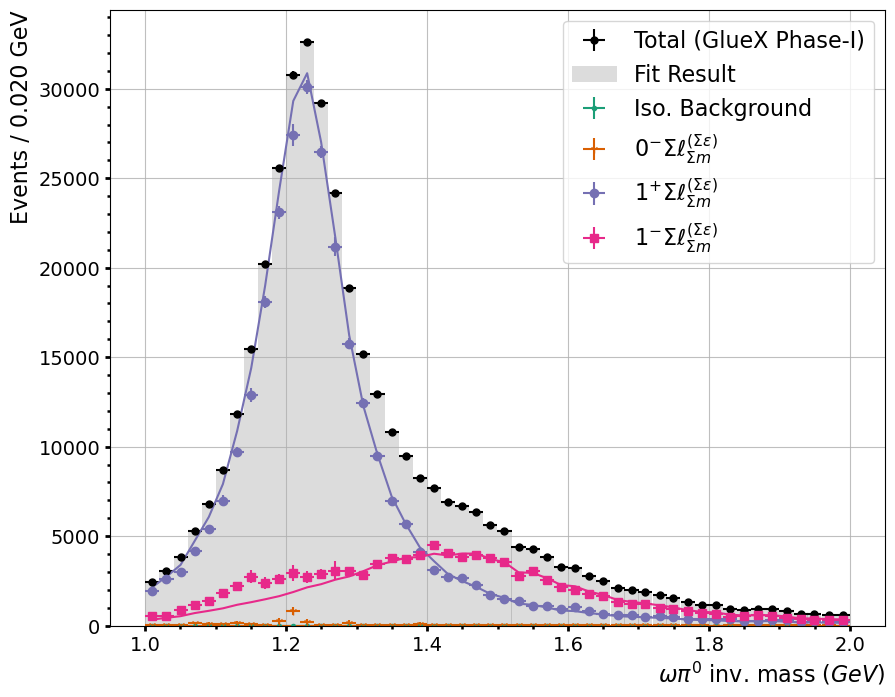

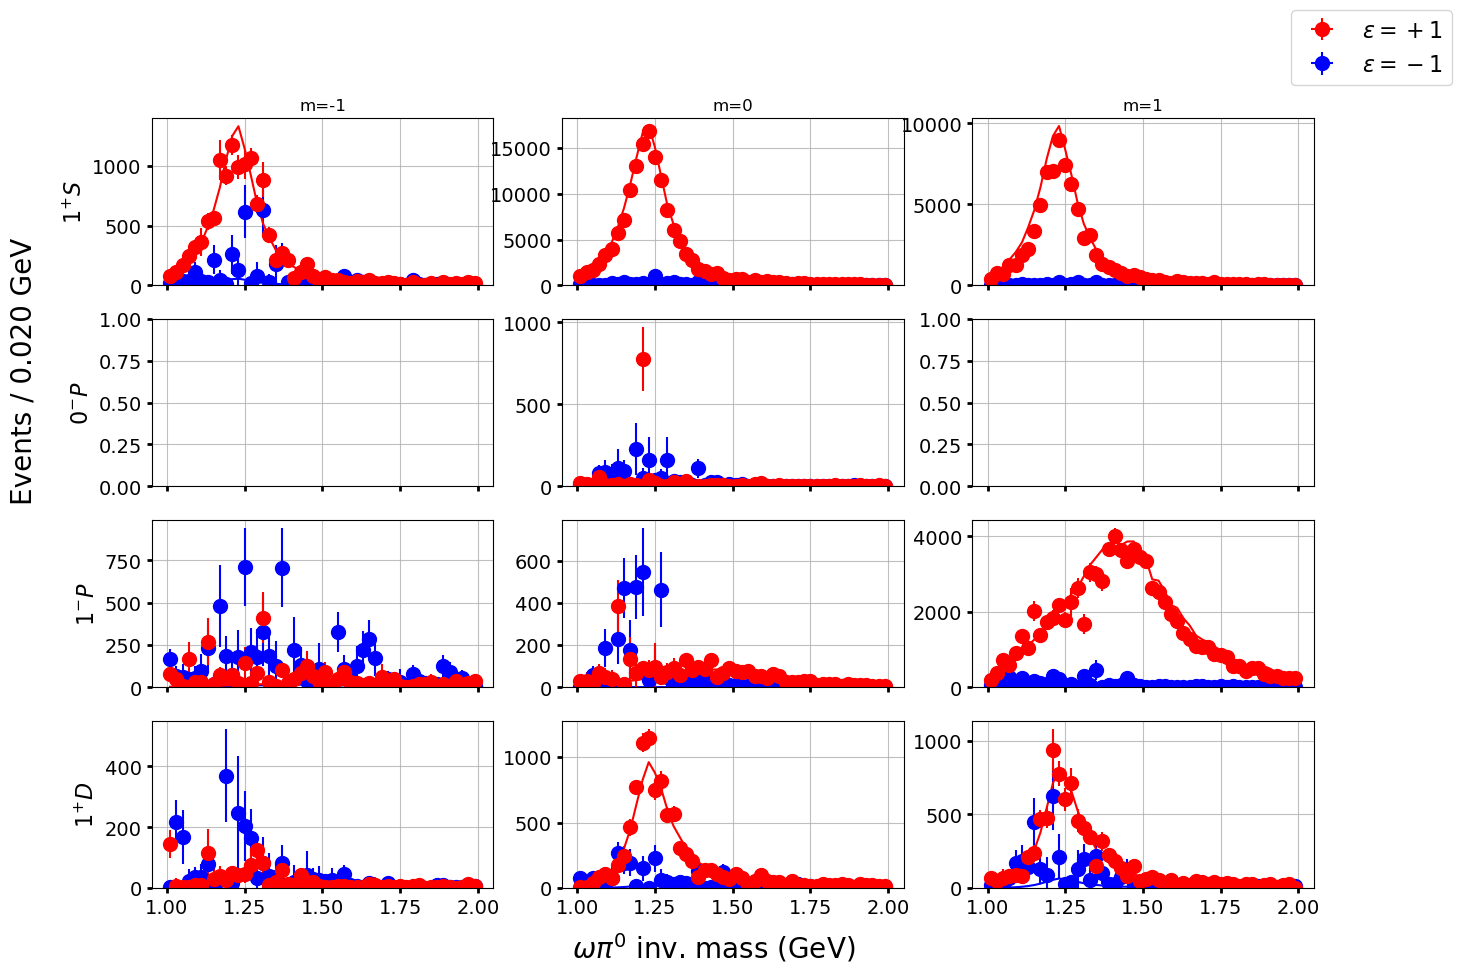

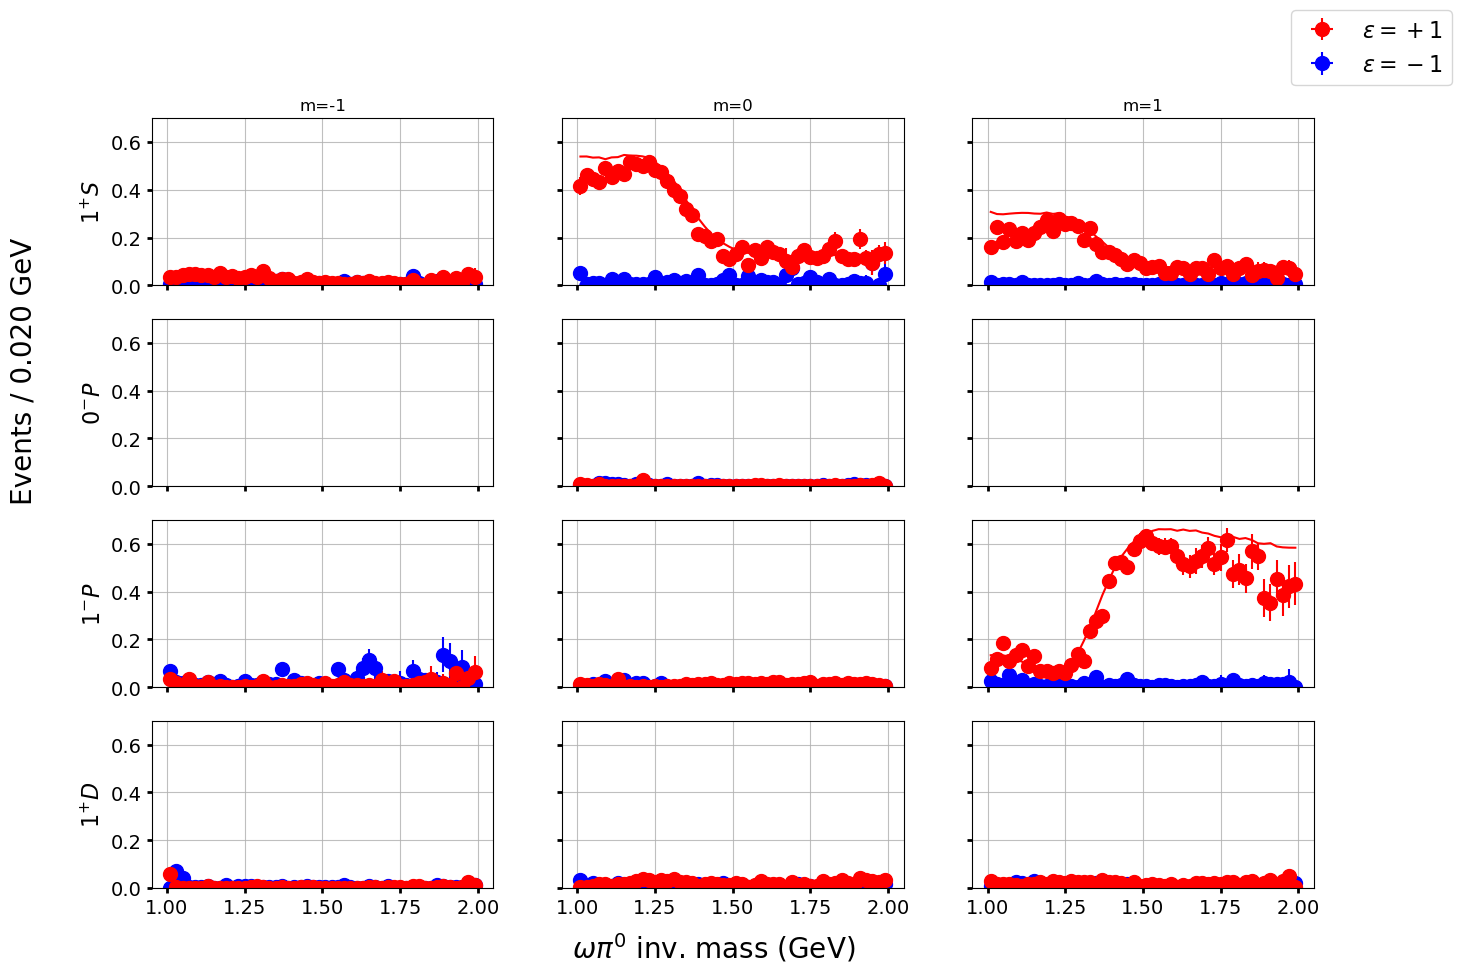

In [8]:
plotter.jp()
plotter.intensities()
plotter.intensities(is_fit_fraction=True, sharey=True)

Looks like the mass independent fits to the accept data have some issues. The bins don't appear to be unstable, but there is a noticeable shift in the $1^-$ wave away from the truth values.

## Truth-Initialized Fits 
Since normal randomized fits are having problems, lets find out what happens when we initialize each bin to the true values

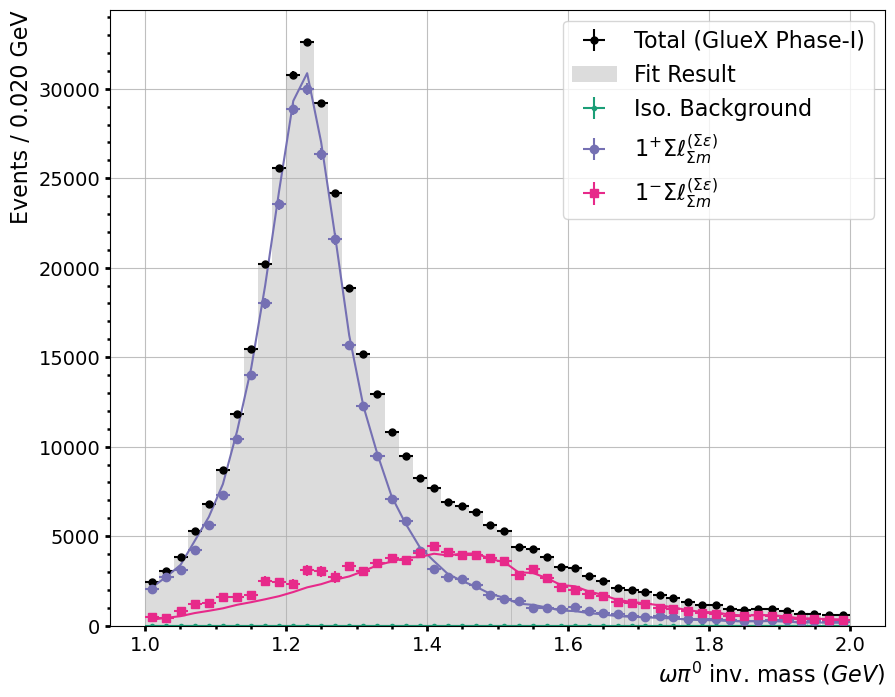

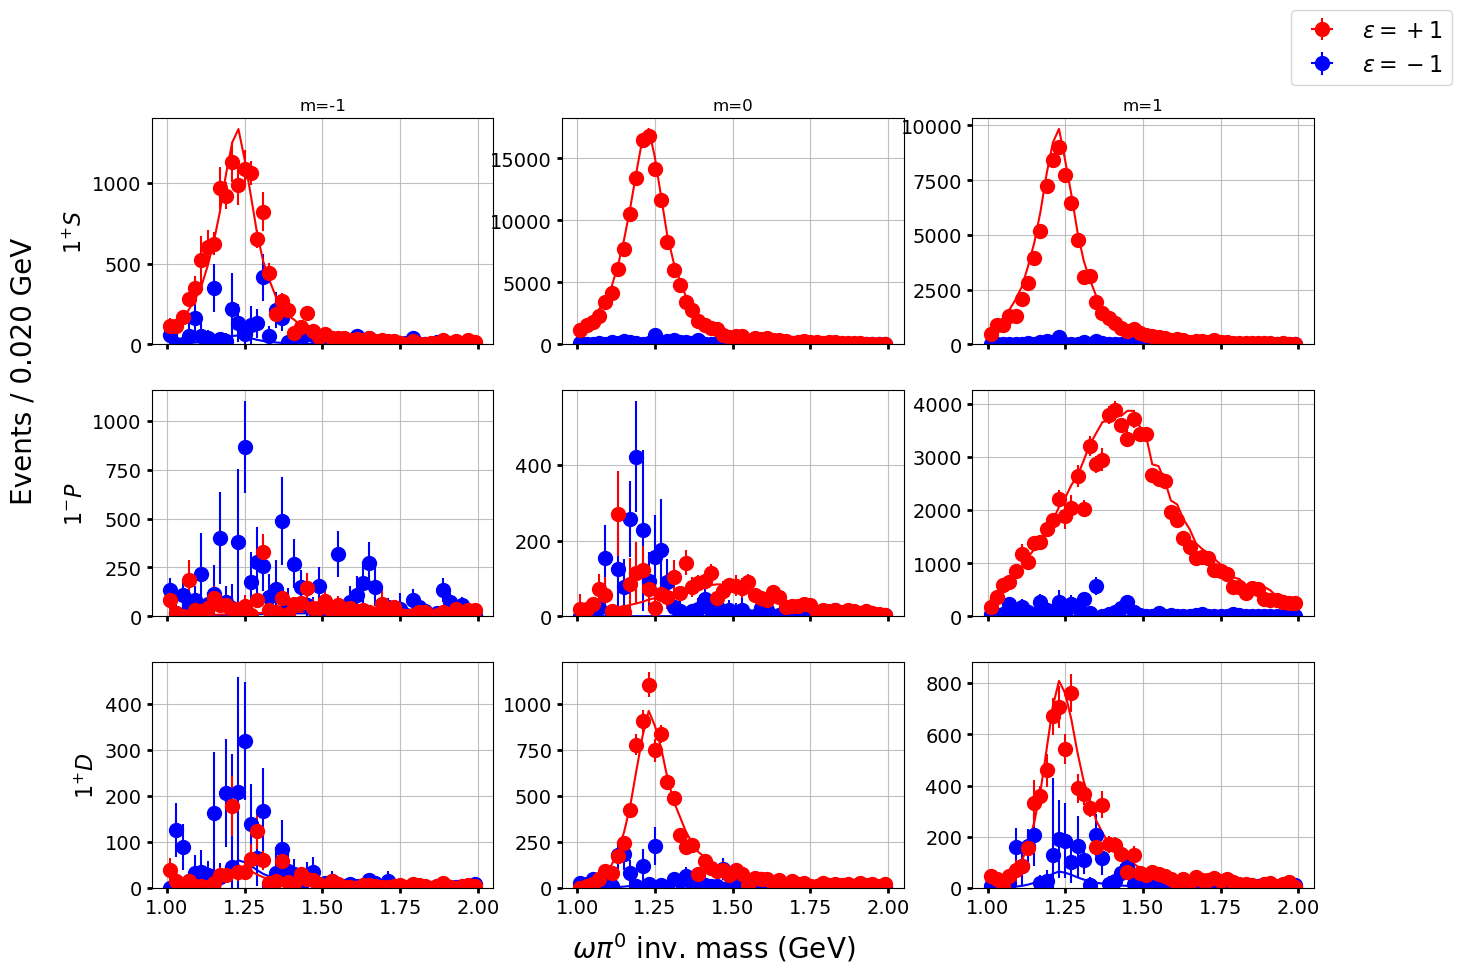

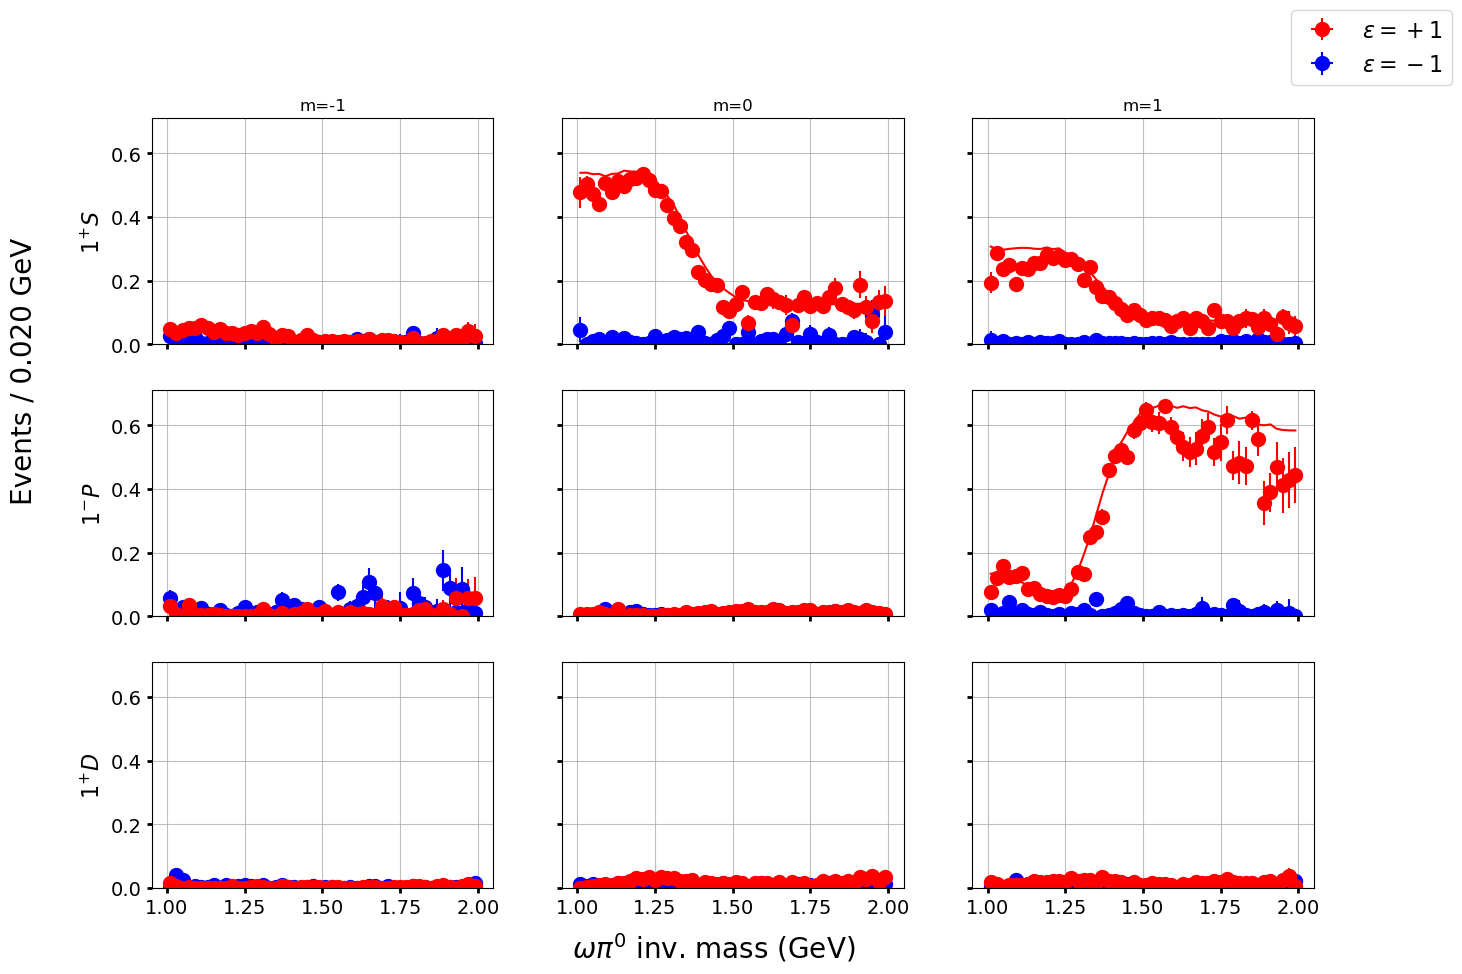

In [10]:
df_truth_init = pd.read_csv(f"{data_path}/truth_init.csv")
plotter_init = pwa_tools.Plotter(df_truth_init, df_data, truth_df=df_truth)

plotter_init.jp()
plotter_init.intensities()
plotter_init.intensities(is_fit_fraction=True, sharey=True)

Overall looking better, but its clear that issues are still prevalent at this stage. Next step is to now fit the accept_noaccidental Monte Carlo files, and see if that fixes the problem